# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [57]:
# Import your libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [341]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [342]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [343]:
# 1 - What does each column mean?
# Channel - Canal de venta
# Region  - Región
# Fresh   - Frutas y Verduras
# Milk    - Lacteos
# Grocery - Abarrotes
# Frozen  - Congelados
# Detergents_Paper - Detergentes y Papel 
# Delicassen - Alimentos Gourmet

In [344]:
# 2 - Any Categorical data to convert? - Channel and Region
customers.Channel = customers.Channel.astype('category')
customers.Region = customers.Region.astype('category')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


In [345]:
# 3 - Any missing value to remove?
customers.isna().sum().sum()

0

In [346]:
# Your comment here
def heat_map(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15,5))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(ax=ax, data=corr, annot=True, cmap='Pastel1_r', mask=mask)
    plt.show()

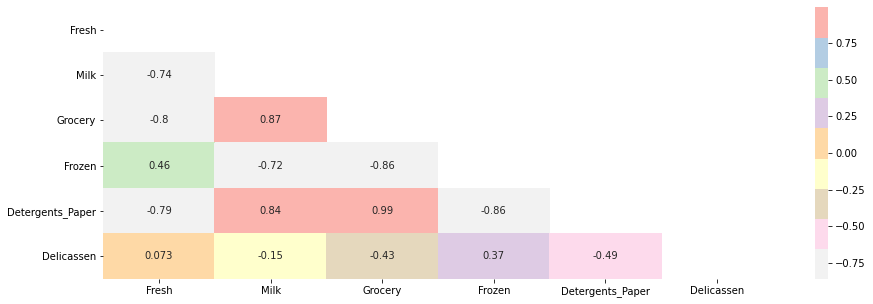

In [347]:
# 4 - Column collinearity - any high correlations?
corr = customers.corr()
heat_map(corr)

In [348]:
# indentificamos si hay columnas con una correlación mayor al 95%
high_corr_var = np.where(corr.abs()>0.95)
high_corr_var = [(corr.columns[x],corr.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[]

In [349]:
# eliminamos outlier utilizando la función de puntuación z de scipy
import scipy.stats as stats
abs_z_score = abs(stats.zscore(customers))
filter_obs = (abs_z_score < 3).all(axis=1)
df = customers[filter_obs]
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<AxesSubplot:>

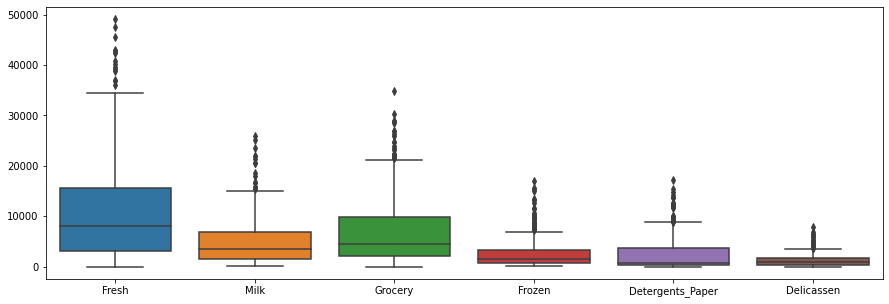

In [350]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(ax=ax, data=df)

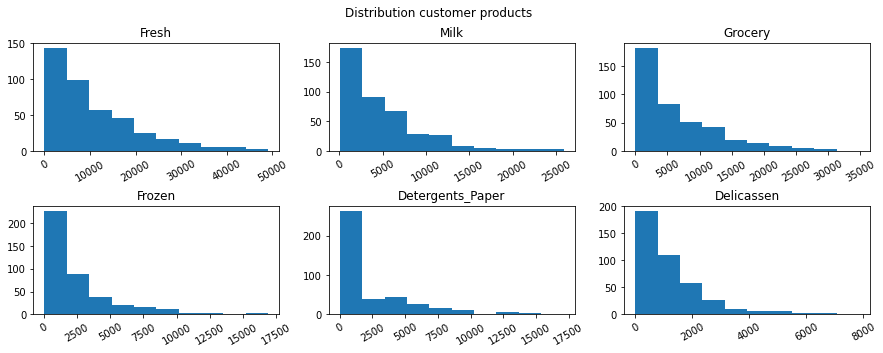

In [351]:
# 6 - Column-wise data distribution - is the distribution skewed?
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.2)
fig.suptitle('Distribution customer products')

cols_to_plot=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for col, ax in zip(cols_to_plot, axes.flatten()):
    ax.hist(df[col])
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=30)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [352]:
# convertimos las variables categorias en dommies
customers_dummies = pd.get_dummies(customers, drop_first=True)
customers_dummies

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,1,0,1
1,7057,9810,9568,1762,3293,1776,1,0,1
2,6353,8808,7684,2405,3516,7844,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1
4,22615,5410,7198,3915,1777,5185,1,0,1
...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,0,1
436,39228,1431,764,4510,93,2346,0,0,1
437,14531,15488,30243,437,14841,1867,1,0,1
438,10290,1981,2232,1038,168,2125,0,0,1


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [353]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scale = pd.DataFrame(scaler.fit_transform(customers_dummies), columns=customers_dummies.columns)
customers_scale

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1.448652,-0.345822,0.626422
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1.448652,-0.345822,0.626422
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1.448652,-0.345822,0.626422
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.690297,-0.345822,0.626422
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1.448652,-0.345822,0.626422
...,...,...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,-0.690297,-0.345822,0.626422
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,-0.690297,-0.345822,0.626422
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1.448652,-0.345822,0.626422
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,-0.690297,-0.345822,0.626422


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [354]:
from sklearn.cluster import KMeans

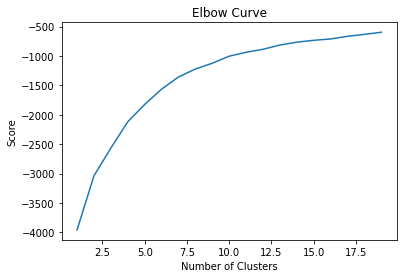

In [307]:
# Obtener el valor de K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(customers_scale).score(customers_scale) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# la curva es muy suave por lo que no se identifica un punto de inflexión directo, el punto 6 parece ser buena opción.

In [355]:
# Hacemos la clusterización con K-Means
km_model = KMeans(n_clusters=6).fit(customers_scale)
centroids = km_model.cluster_centers_
centroids

array([[ 2.00279219e+00,  2.31952819e-01, -5.92314411e-02,
         1.85669120e+00, -3.68179574e-01,  8.53300176e-01,
        -6.23454939e-01, -2.44650690e-01,  7.07251133e-02],
       [ 1.96681731e+00,  5.17550306e+00,  1.28721685e+00,
         6.90059988e+00, -5.54861977e-01,  1.64784475e+01,
        -6.90297086e-01, -3.45822028e-01,  6.26422432e-01],
       [ 3.13830315e-01,  3.92190593e+00,  4.27561037e+00,
        -3.57419457e-03,  4.61816580e+00,  5.03365339e-01,
         1.44865163e+00, -2.20737465e-02, -4.04143505e-02],
       [-2.05062351e-01, -1.30982247e-01, -1.27763067e-02,
        -4.17251830e-02,  1.99235536e-02, -1.65171126e-01,
         1.65282401e-01,  2.89166079e+00, -1.59636684e+00],
       [-1.15912988e-01, -3.70141815e-01, -4.68858247e-01,
        -1.16480412e-01, -4.36939418e-01, -1.85636965e-01,
        -6.90297086e-01, -3.45822028e-01,  1.42803008e-01],
       [-2.85517350e-01,  3.76469402e-01,  6.23753455e-01,
        -3.23562166e-01,  6.16698330e-01,  2.639140

Count the values in `labels`.

In [356]:
# Your code here:
kmean_labels = pd.Series(km_model.labels_).value_counts()
kmean_labels

4    239
5    113
3     45
0     32
2     10
1      1
dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [357]:
from sklearn.cluster import DBSCAN

In [358]:
# Your code here
dbs_model = DBSCAN(eps=0.5, min_samples=4)
dbs_model.fit(customers_scale)

DBSCAN(min_samples=4)

Count the values in `labels_DBSCAN`.

In [359]:
# Your code here
dbscan_labels = pd.Series(dbs_model.labels_).value_counts()
dbscan_labels

-1    242
 2    131
 4     22
 1     18
 7      7
 5      6
 3      5
 0      5
 6      4
dtype: int64

In [360]:
# Agregamos las etiquetas de K-Means y DBScan al dataset de trabajo
df = pd.concat([df, kmean_labels, dbscan_labels], axis=1)
df = df.rename(columns={0:'kmean_labels', 1:'dbscan_labels'})
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmean_labels,dbscan_labels
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,32.0,5.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,1.0,18.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,10.0,131.0
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,45.0,5.0


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

In [361]:
def scatt_plot(col1, col2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.2)
    fig.suptitle(col1 +' and '+ col2)
    axes[0].set_title('K-Mean')
    axes[1].set_title('DBScan')
    sns.scatterplot(ax=axes[0], data=df, x=col1, y=col2, hue='kmean_labels')
    sns.scatterplot(ax=axes[1], data=df, x=col1, y=col2, hue='dbscan_labels')

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

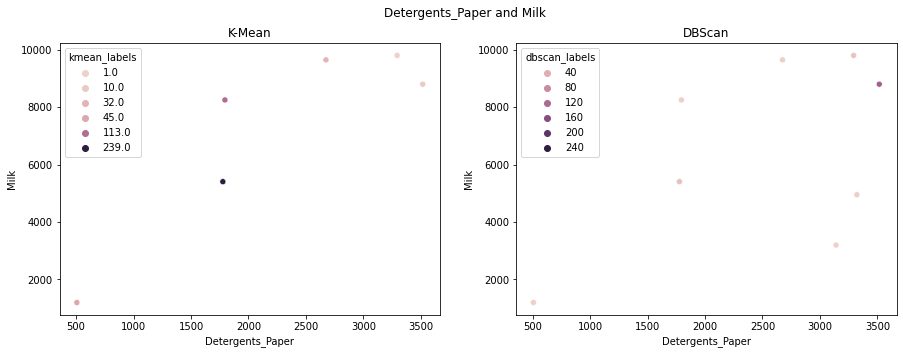

In [362]:
scatt_plot('Detergents_Paper', 'Milk')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

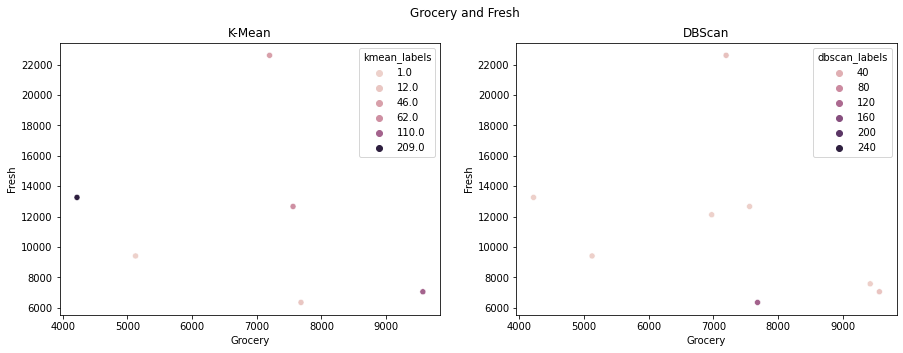

In [315]:
scatt_plot('Grocery', 'Fresh')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

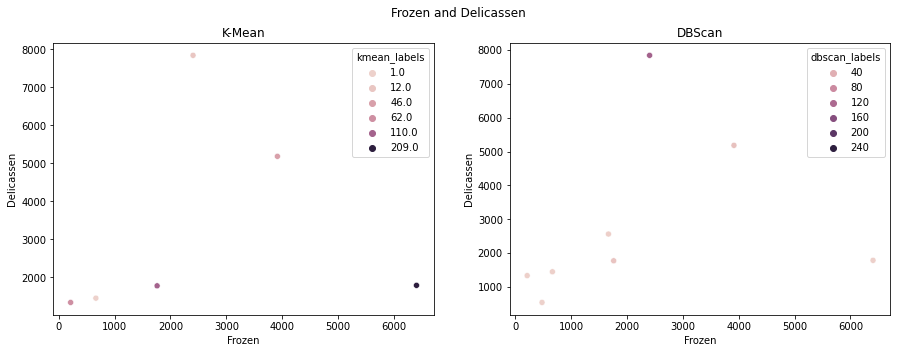

In [316]:
scatt_plot('Frozen', 'Delicassen')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [320]:
# Your code here:
df.groupby(['kmean_labels']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,dbscan_labels
kmean_labels,,,,,,,
1.0,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,6.0
12.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,131.0
46.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,22.0
62.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,5.0
110.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,18.0
209.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,5.0


In [321]:
df.groupby(['dbscan_labels']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmean_labels
dbscan_labels,,,,,,,
4.0,12126.0,3199.0,6975.0,480.0,3140.0,545.0,NaN
5.0,12967.0,5426.0,5891.0,3309.0,1590.5,1563.0,135.5
6.0,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,1.0
7.0,7579.0,4956.0,9426.0,1669.0,3321.0,2566.0,NaN
18.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,110.0
22.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,46.0
131.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,12.0
242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Which algorithm appears to perform better?

In [83]:
# Your observations here
# creo que el Kmeans ya que el dbscan genera cluster vacios aunque los que estan clasificados son similires

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [84]:
# Your code here

In [85]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [86]:
# Your code here

In [87]:
# Your comment here